In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
height_data= pd.read_csv('/content/drive/MyDrive/Height_Dataset/Height.csv')

In [ ]:
height_data.head()


,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [ ]:
height_data.tail()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
194,195,Mozambique,164.30,155.42,5.39,5.10
195,196,Papua New Guinea,163.10,156.89,5.35,5.15
196,197,Solomon Islands,163.07,156.79,5.35,5.14
197,198,Laos,162.78,153.10,5.34,5.02
198,199,Timor-Leste,160.13,152.71,5.25,5.01


In [ ]:
height_data.shape

(199, 6)

In [ ]:
height_data.columns


Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm',
       'Male Height in Ft', 'Female Height in Ft'],
      dtype='object')

In [ ]:
height_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 199 non-null    int64  
 1   Country Name         199 non-null    object 
 2   Male Height in Cm    199 non-null    float64
 3   Female Height in Cm  199 non-null    float64
 4   Male Height in Ft    199 non-null    float64
 5   Female Height in Ft  199 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
height_data.describe()

,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,5.678794,5.280402
std,57.590508,4.949832,4.076377,0.162510,0.133870
min,1.000000,160.130000,150.910000,5.250000,4.950000
25%,50.500000,169.490000,158.240000,5.560000,5.190000
50%,100.000000,173.530000,160.620000,5.690000,5.270000
75%,149.500000,176.510000,163.870000,5.790000,5.375000
max,199.000000,183.780000,170.360000,6.030000,5.590000


In [ ]:
height_data.isnull().sum()


Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

In [ ]:
height_data.drop(['Male Height in Ft', 'Female Height in Ft'],axis = 1)

,Rank,Country Name,Male Height in Cm,Female Height in Cm
0,1,Netherlands,183.78,170.36
1,2,Montenegro,183.30,169.96
2,3,Estonia,182.79,168.66
3,4,Bosnia and Herzegovina,182.47,167.47
4,5,Iceland,182.10,168.91
...,...,...,...,...
194,195,Mozambique,164.30,155.42
195,196,Papua New Guinea,163.10,156.89
196,197,Solomon Islands,163.07,156.79
197,198,Laos,162.78,153.10


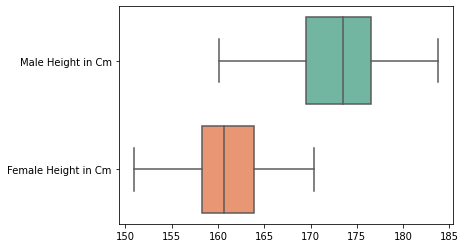

In [ ]:
sns.boxplot(data = height_data.loc[:,['Male Height in Cm', 'Female Height in Cm']],
orient = 'h', palette = 'Set2')


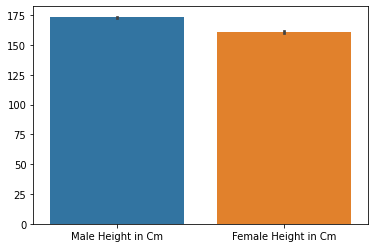

In [ ]:
sns.barplot(data = height_data.loc[:,['Male Height in Cm', 'Female Height in Cm']])

In [ ]:
avg_height_male = height_data['Male Height in Cm'].mean()

In [ ]:
avg_height_male

173.08904522613065

In [ ]:
avg_height_female = height_data['Female Height in Cm'].mean()

In [ ]:
avg_height_female

160.9429145728643

In [ ]:
max_height_male = height_data['Male Height in Cm'].idxmax()
max_height_country =height_data['Country Name'][max_height_male]
print(f"The tallest Male or height of male is :{max_height_country} at {height_data['Male Height in Cm']}")

The tallest Male or height of male is :Netherlands at 0      183.78
1      183.30
2      182.79
3      182.47
4      182.10
        ...  
194    164.30
195    163.10
196    163.07
197    162.78
198    160.13
Name: Male Height in Cm, Length: 199, dtype: float64


In [ ]:
max_height_female = height_data['Female Height in Cm'].idxmax()
max_height_country_female =height_data['Country Name'][max_height_female]
print(f"The tallest female or height of female is :{max_height_country_female} at {height_data['Female Height in Cm']}")

The tallest female or height of female is :Netherlands at 0      170.36
1      169.96
2      168.66
3      167.47
4      168.91
        ...  
194    155.42
195    156.89
196    156.79
197    153.10
198    152.71
Name: Female Height in Cm, Length: 199, dtype: float64


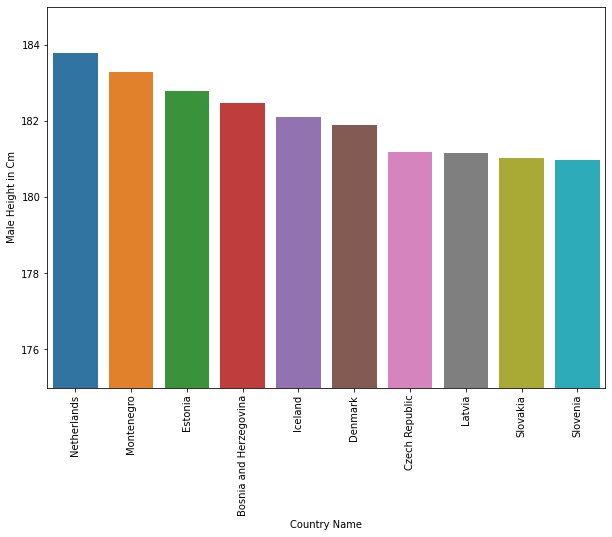

In [ ]:
plt.figure(figsize=(10,7))
max_height = height_data.sort_values('Male Height in Cm',ascending=False).head(10)
sns.barplot(x='Country Name',y = max_height['Male Height in Cm'],data = max_height)
plt.ylim(ymax=185,ymin=175)
plt.xticks(rotation = 90)
plt.show()

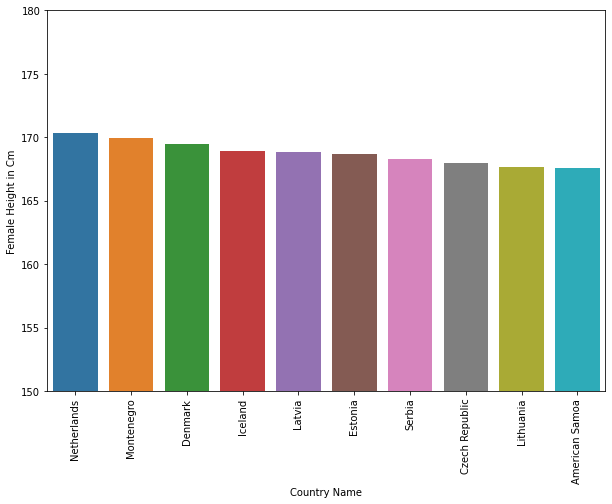

In [ ]:
plt.figure(figsize=(10,7))
max_height_female = height_data.sort_values('Female Height in Cm',ascending=False).head(10)
sns.barplot(x='Country Name',y = height_data['Female Height in Cm'],data = max_height_female)
plt.ylim(ymax=180,ymin=150)
plt.xticks(rotation = 90)
plt.show()

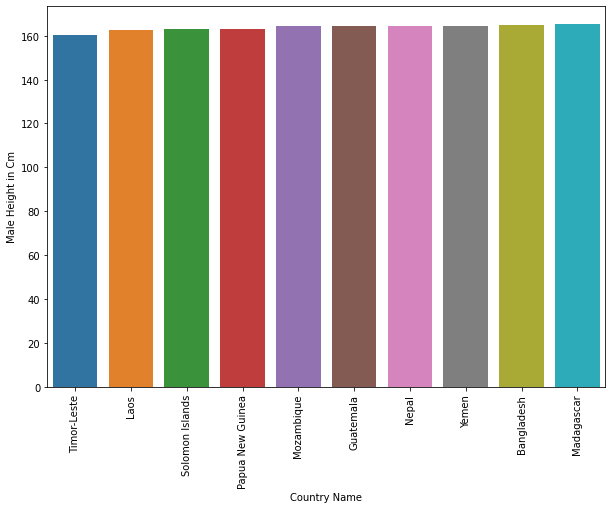

In [ ]:
plt.figure(figsize=(10,7))
min_height = height_data.sort_values('Male Height in Cm',ascending=True).head(10)
sns.barplot(x='Country Name',y = min_height['Male Height in Cm'],data = min_height)
plt.xticks(rotation = 90)
plt.show()

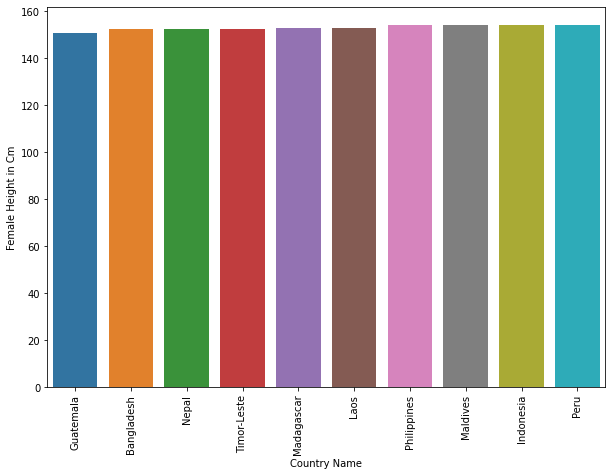

In [ ]:
plt.figure(figsize=(10,7))
min_height = height_data.sort_values('Female Height in Cm',ascending=True).head(10)
sns.barplot(x='Country Name',y = min_height['Female Height in Cm'],data = min_height)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
min_height_male = height_data['Male Height in Cm'].idxmin()
min_height_country =height_data['Country Name'][min_height_male]
print(f"The smallest Male or height of male is :{min_height_country} at {height_data['Male Height in Cm']}")

The smallest Male or height of male is :Timor-Leste at 0      183.78
1      183.30
2      182.79
3      182.47
4      182.10
        ...  
194    164.30
195    163.10
196    163.07
197    162.78
198    160.13
Name: Male Height in Cm, Length: 199, dtype: float64


In [ ]:
min_height_female = height_data['Female Height in Cm'].idxmin()
min_height_country_female =height_data['Country Name'][min_height_female]
print(f"The smallest Female or height of female is :{min_height_country} at {height_data['Female Height in Cm']}")

The smallest Female or height of female is :Timor-Leste at 0      170.36
1      169.96
2      168.66
3      167.47
4      168.91
        ...  
194    155.42
195    156.89
196    156.79
197    153.10
198    152.71
Name: Female Height in Cm, Length: 199, dtype: float64
